In [25]:
from super_gradients.training import models
import cv2
import matplotlib.pyplot as plt
from futstats.annotations.anns import Detection
from futstats.homography.homography_utils import clean_detections
import numpy as np

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
CLASSES = [
    "1",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
    "16",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
    "c",
]
NUM_CLASES = len(CLASSES)

In [86]:
field_model = models.get(
        "yolo_nas_l",
        num_classes=NUM_CLASES,
        checkpoint_path="../../models/LANDMARKS.pth",
    )

[2023-10-02 23:37:06] INFO - checkpoint_utils.py - Successfully loaded model weights from ../../models/LANDMARKS.pth EMA checkpoint.


In [87]:
img = cv2.cvtColor(cv2.imread('../homography/frame3.png'), cv2.COLOR_BGR2RGB)
field = cv2.cvtColor(cv2.imread('../homography/field_2d.jpg'), cv2.COLOR_BGR2RGB)

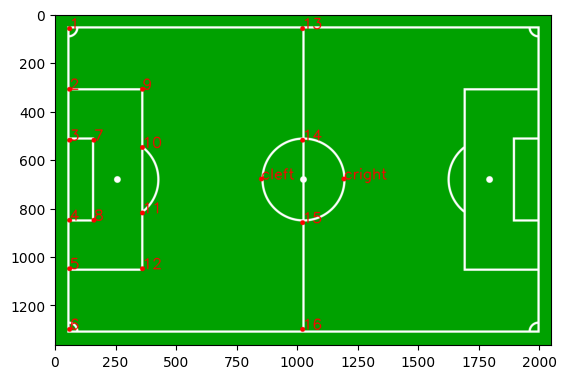

In [88]:
POINT2POINT2D = {
    "1" : (60, 60),
    "2" : (60,310),
    "3" : (60,520),
    "4" : (60,850),
    "5" : (60,1050),
    "6" : (60,1300),
    "7" : (160,520),
    "8" : (160,850),
    "9" : (360,310),
    "10" : (360,550),
    "11" : (360,820),
    "12" : (360,1050),
    "13": (1020,60),
    "14" : (1020,520),
    "15" : (1020,860),
    "16" : (1020,1300),
    "cright" : (1190,680),
    "cleft" : (850,680),
}

check = field.copy()

for id_, coord in POINT2POINT2D.items():
    check = cv2.circle(check, coord, 10, (255, 0, 0), -1)
    check = cv2.putText(check, id_, coord, cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0),3)

plt.imshow(check)

In [89]:
results = list(field_model.predict(img, conf=0.25))[0]
detections = Detection.from_yoloNas(pred=results)

[2023-10-02 23:37:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


In [90]:
clean_field_detections, src_points, dst_points = clean_detections(detections=detections)

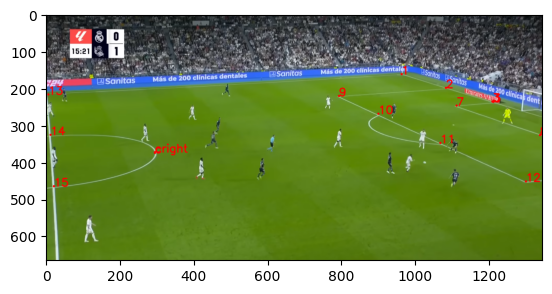

In [91]:
points = img.copy()

for detection in detections:
    x2, y2 = detection.rect.bottom_right.int_xy_tuple
    x1, y1 = detection.rect.top_left.int_xy_tuple
    # get the center of the box
    center = (int((x1 + x2) / 2),int((y1 + y2) / 2))
    points = cv2.circle(points, center, 3, (255, 0, 0), -1)
    points = cv2.putText(points, detection.class_name, center, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

plt.imshow(points)

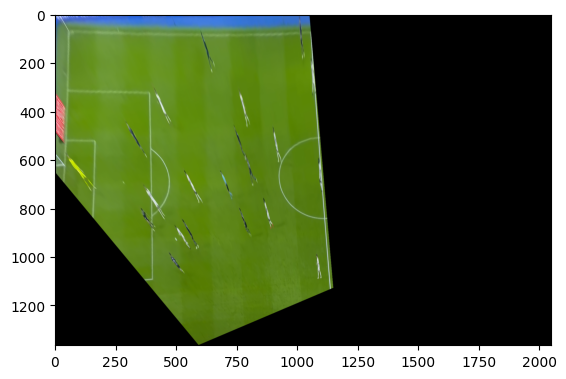

In [92]:
H, status = cv2.findHomography(np.array(src_points), np.array(dst_points))
im_out = cv2.warpPerspective(img, H, (field.shape[1],field.shape[0]))
plt.imshow(im_out)

# ORIENTATION EXPERIMENT

In [75]:
for detection in clean_field_detections:
    

15
12
14
9
7
11
10
1
3
2
13
8
cleft
cright
